# **ME03**

# Universidad de Antioquia

 Especialización en Analítica y Ciencia de Datos

Seminario

# Integrantes

Juan Sebastian Espinosa CC:1036684191

Jose Luis Mena CC:1028024777

**Librerias**

In [ ]:
import numpy as np  # Librería para realizar cálculos numéricos y manejar arreglos multidimensionales
import pandas as pd  # Librería principal para la manipulación y análisis de datos estructurados (DataFrames)
import seaborn as sns  # Librería para visualizaciones estadísticas avanzadas y atractivas
import matplotlib.pyplot as plt  # Librería para crear visualizaciones gráficas (gráficos de barras, histogramas, etc.)
from sklearn.preprocessing import StandardScaler  # Para estandarizar los datos numéricos (media=0, desviación estándar=1)
from sklearn.preprocessing import OneHotEncoder  # Para convertir variables categóricas en formato numérico binario (0 o 1)
from sklearn.model_selection import train_test_split  # Para dividir el dataset en conjuntos de entrenamiento y prueba
import scipy.stats as stats  # Proporciona herramientas estadísticas avanzadas (pruebas de normalidad, correlación, etc.)
from sklearn.preprocessing import LabelEncoder  # Para convertir variables categóricas en etiquetas numéricas (enteros)
from statsmodels.tsa.seasonal import seasonal_decompose # se utiliza para descomponer una serie temporal en sus componentes básicos
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  # Para graficar funciones de autocorrelación y autocorrelación parcial

# Importación de Datos y Selección de Columnas Significativas

En esta sección, importamos los datos provenientes del archivo 'SIGAT_ANUARIO_2023'guardado en el repositorio de GitHub, en formato .xlsx. A partir de estos datos, seleccionamos las columnas más relevantes para el análisis de la gravedad de los accidentes. Las tablas de origen contienen la siguiente información:



*   Siniestros: Información sobre los accidentes ocurridos.
*   Vehículos: Información de los vehículos involucrados en los accidentes.
*   Actores: Información sobre las personas afectadas en los accidentes.





Se utilizó la función .info() de Pandas para obtener una visión preliminar de los campos de cada una de las tres tablas. Esto permitió identificar la estructura y los tipos de datos de las columnas antes de proceder con el análisis y la selección de las variables significativas.

Las variables finalmente seleccionadas pueden consultarse en el siguiente [diccionario de datos](https://view.officeapps.live.com/op/view.aspx?src=https%3A%2F%2Fraw.githubusercontent.com%2FDCJuanLab%2FMonograf-a%2Frefs%2Fheads%2Fmain%2FDiccionario%2520de%2520Datos.xlsx&wdOrigin=BROWSELINK).

In [ ]:
# Importar datos

ruta = 'https://github.com/DCJuanLab/Monograf-a/raw/main/SIGAT_ANUARIO_2023.xlsx'

siniestros = pd.read_excel(ruta)
vehiculos = pd.read_excel(ruta, sheet_name='Vehiculos')
actores = pd.read_excel(ruta, sheet_name='Actor_vial')

In [ ]:
siniestros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14106 entries, 0 to 14105
Data columns (total 40 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Codigo_Accidente                14106 non-null  int64         
 1   Formulario                      14106 non-null  object        
 2   Longitud                        14106 non-null  float64       
 3   Latitud                         14106 non-null  float64       
 4   Direccion                       14106 non-null  object        
 5   Fecha_Acc                       14106 non-null  datetime64[ns]
 6   AA_Acc                          14106 non-null  int64         
 7   MM_Acc                          14106 non-null  object        
 8   DD_Mes_Acc                      14106 non-null  int64         
 9   Dia_Semana_Acc                  14106 non-null  object        
 10  Hora_Acc                        14106 non-null  int64         
 11  Mi

In [ ]:
# Seleccionar campos a utilizar del DataFrame siniestros.
siniestros = siniestros[['Codigo_Accidente','Longitud','Latitud','Fecha_Acc','Hora_Min_Acc','Localidad','Clase_Acc','Gravedad_Indicador_Tradicional',
            'Con_Bicicleta','Con_Carga','Con_Embriaguez','Con_Huecos','Con_Menores','Con_Moto','Con_Peaton','Con_Persona_Mayor','Con_Velocidad','Con_Trans_Public']]


In [ ]:
vehiculos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24403 entries, 0 to 24402
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Codigo_Accidente              24403 non-null  int64         
 1   Formulario                    24403 non-null  object        
 2   Fecha_Acc                     24403 non-null  datetime64[ns]
 3   AA_Acc                        24403 non-null  int64         
 4   Codigo_Vehiculo               24403 non-null  int64         
 5   Clase                         24399 non-null  object        
 6   Servicio                      24403 non-null  object        
 7   Modalidad                     2505 non-null   object        
 8   Vehiculo_Viajaba_Clasificado  24403 non-null  object        
 9   Tipo_SITP                     2222 non-null   object        
 10  Con_Bicicleta                 4314 non-null   object        
 11  Con_Carga                   

In [ ]:
# Seleccionar campos a utilizar del DataFrame vehículos.
vehiculos = vehiculos[['Codigo_Accidente','Codigo_Vehiculo','Clase','Vehiculo_Viajaba_Clasificado']]


In [ ]:
actores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33542 entries, 0 to 33541
Data columns (total 42 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Codigo_Accidentado              33542 non-null  int64         
 1   Codigo_Accidente                33542 non-null  int64         
 2   Formulario                      33542 non-null  object        
 3   Codigo_Vehiculo                 33542 non-null  int64         
 4   Ccodigo_Victima                 33542 non-null  int64         
 5   FechaAcc                        33542 non-null  datetime64[ns]
 6   AnnoAcc                         33542 non-null  int64         
 7   mesAcc                          33542 non-null  object        
 8   DD_Mes_Acc                      33542 non-null  int64         
 9   Dia_Semana_Acc                  33542 non-null  object        
 10  hourAcc                         33542 non-null  int64         
 11  mi

In [ ]:
# Seleccionar campos a utilizar del DataFrame actores.
actores = actores[['Codigo_Accidente','Codigo_Vehiculo','Edad','Sexo','Gravedad_Indicador_Tradicional','Muerte_Posterior','Condicion']]


# Unión de Campos Seleccionados de las Tablas

En esta sección, se realizó la unión de los campos seleccionados de las tres tablas de estudio mediante la función merge() de Pandas, utilizando como columna de unión el 'Codigo_accidente', que actúa como el identificador único de cada accidente. Esta operación permitió combinar la información de las tres tablas en un solo DataFrame, lo que facilita el análisis de datos al consolidar los detalles de cada accidente junto con las características de los vehículos involucrados y las personas afectadas. El DataFrame resultante contiene información relevante sobre cada persona involucrada en los accidentes, lo cual es esencial para la predicción de la gravedad.

In [ ]:
# Relacionar los DataFrames actores, vehículos y siniestros mediante la columna Codigo_Accidente

df = pd.merge(siniestros, vehiculos, on='Codigo_Accidente', how='inner')
df = pd.merge(df, actores, on=('Codigo_Accidente','Codigo_Vehiculo'), how='inner')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33542 entries, 0 to 33541
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Codigo_Accidente                  33542 non-null  int64         
 1   Longitud                          33542 non-null  float64       
 2   Latitud                           33542 non-null  float64       
 3   Fecha_Acc                         33542 non-null  datetime64[ns]
 4   Hora_Min_Acc                      33542 non-null  object        
 5   Localidad                         33542 non-null  object        
 6   Clase_Acc                         33542 non-null  object        
 7   Gravedad_Indicador_Tradicional_x  33542 non-null  object        
 8   Con_Bicicleta                     4702 non-null   object        
 9   Con_Carga                         2100 non-null   object        
 10  Con_Embriaguez                    1170 non-nul

# Manejo de Valores Faltantes y Eliminación de Registros Duplicados

En esta sección, se procedió a llenar los campos con valores vacíos en función del diccionario de datos. Para los campos binarios, que solo pueden tomar los valores "Sí" o "No", se llenaron los campos vacíos con "No", dado que en estos casos solo aparecía el valor "Sí" en algunos registros. Este proceso se realizó utilizando la función .fillna() de Pandas.

Además, se eliminaron los registros con campos vacíos en las columnas 'Sexo', 'Edad' y 'Vehiculo_Viajaba_Clasificado', ya que dichos campos son esenciales para el análisis. En el caso de la columna 'Vehiculo_Viajaba_Clasificado', se eliminaron aquellos registros con el valor "sin información", que representaban una pequeña cantidad en comparación con el total de filas. También se eliminaron los registros duplicados utilizando la función .drop_duplicates() de Pandas.

In [ ]:
#Llenado de datos vacíos de acuerdo a la información suministrada por la fuente de los datos.
df['Con_Bicicleta']=df['Con_Bicicleta'].fillna('NO')
df['Con_Carga']=df['Con_Carga'].fillna('NO')
df['Con_Embriaguez']=df['Con_Embriaguez'].fillna('NO')
df['Con_Huecos']=df['Con_Huecos'].fillna('NO')
df['Con_Menores']=df['Con_Menores'].fillna('NO')
df['Con_Moto']=df['Con_Moto'].fillna('NO')
df['Con_Peaton']=df['Con_Peaton'].fillna('NO')
df['Con_Persona_Mayor']=df['Con_Persona_Mayor'].fillna('NO')
df['Con_Velocidad']=df['Con_Velocidad'].fillna('NO')

In [ ]:
#eliminacion de registros sin informacion
df =df.dropna(subset=['Sexo', 'Edad']) # Se eliminan los datos que no tienen sexo o edad
df = df[df['Vehiculo_Viajaba_Clasificado'] !='SIN INFORMACIÓN'] # se elimina los datos que estan sin informacion en el campo'Vehiculo_Viajaba_Clasificado'

#Reiniciar el indice
df.reset_index(drop=True, inplace=True)
#Se elimina Gravedad_Indicador_Tradicional_x
df = df.drop('Gravedad_Indicador_Tradicional_x', axis=1)
#df = df.drop('Codigo_Accidente', axis=1)
df = df.drop('Codigo_Vehiculo', axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32384 entries, 0 to 32383
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Codigo_Accidente                  32384 non-null  int64         
 1   Longitud                          32384 non-null  float64       
 2   Latitud                           32384 non-null  float64       
 3   Fecha_Acc                         32384 non-null  datetime64[ns]
 4   Hora_Min_Acc                      32384 non-null  object        
 5   Localidad                         32384 non-null  object        
 6   Clase_Acc                         32384 non-null  object        
 7   Con_Bicicleta                     32384 non-null  object        
 8   Con_Carga                         32384 non-null  object        
 9   Con_Embriaguez                    32384 non-null  object        
 10  Con_Huecos                        32384 non-nu

In [ ]:
#Verificación de registros duplicados.
df.loc[df.duplicated()]

,Codigo_Accidente,Longitud,Latitud,Fecha_Acc,Hora_Min_Acc,Localidad,Clase_Acc,Con_Bicicleta,Con_Carga,Con_Embriaguez,...,Con_Persona_Mayor,Con_Velocidad,Con_Trans_Public,Clase,Vehiculo_Viajaba_Clasificado,Edad,Sexo,Gravedad_Indicador_Tradicional_y,Muerte_Posterior,Condicion
254,10597294,-74.118716,4.657884,2023-10-18,8:10,FONTIBON,Choque,NO,NO,NO,...,NO,NO,NO,Motocicleta,MOTOCICLETA,28.0,Masculino,HERIDO,N,MOTOCICLISTA
1049,10589402,-74.041753,4.740589,2023-03-29,20:33,USAQUEN,Choque,SI,NO,NO,...,NO,NO,SI,Bicicleta,BICICLETA,19.0,Masculino,HERIDO,N,CICLISTA
1330,10593505,-74.107731,4.597793,2023-07-10,10:20,ANTONIO NARIÑO,Choque,NO,NO,NO,...,NO,NO,NO,Motocicleta,MOTOCICLETA,28.0,Masculino,HERIDO,N,MOTOCICLISTA
1521,10593563,-74.145412,4.595304,2023-07-13,19:38,KENNEDY,Choque,NO,NO,NO,...,SI,NO,SI,Microbus,TRANSPORTE DE PASAJEROS,26.0,Masculino,HERIDO,N,PASAJERO
1523,10593563,-74.145412,4.595304,2023-07-13,19:38,KENNEDY,Choque,NO,NO,NO,...,SI,NO,SI,Microbus,TRANSPORTE DE PASAJEROS,53.0,Masculino,HERIDO,N,PASAJERO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31757,10597007,-74.144671,4.588062,2023-10-08,3:0,TUNJUELITO,Choque,NO,NO,NO,...,NO,SI,NO,Motocicleta,MOTOCICLETA,19.0,Masculino,HERIDO,N,MOTOCICLISTA
31779,10595319,-74.144856,4.618993,2023-08-27,6:32,KENNEDY,Choque,NO,NO,NO,...,NO,NO,NO,Automovil,LIVIANO,20.0,Masculino,HERIDO,N,PASAJERO
31984,10595834,-74.040115,4.760345,2023-09-10,5:9,USAQUEN,Caida de ocupante,NO,NO,NO,...,NO,NO,NO,Motocicleta,MOTOCICLETA,17.0,Femenino,HERIDO,N,PASAJERO
32045,10596087,-74.109113,4.506708,2023-09-17,0:55,USME,Choque,NO,NO,NO,...,NO,NO,NO,Motocicleta,MOTOCICLETA,24.0,Masculino,HERIDO,N,MOTOCICLISTA


In [ ]:
#Eliminación de registros duplicados.
df = df.drop_duplicates()

#Reiniciar el indice
df.reset_index(drop=True,inplace=True)

In [ ]:
#Verificación de registros duplicados
df.loc[df.duplicated()]

,Codigo_Accidente,Longitud,Latitud,Fecha_Acc,Hora_Min_Acc,Localidad,Clase_Acc,Con_Bicicleta,Con_Carga,Con_Embriaguez,...,Con_Persona_Mayor,Con_Velocidad,Con_Trans_Public,Clase,Vehiculo_Viajaba_Clasificado,Edad,Sexo,Gravedad_Indicador_Tradicional_y,Muerte_Posterior,Condicion


A continuación, se crearon dos dataframes en los cuales separamos las variables categóricas de las variables numéricas con el fin de analizarlas más facilmente.

In [ ]:
#Lista de variables categóricas
Columnas_categoricas = df.select_dtypes(include = ["object", 'category']).columns.tolist()
# Remover 'Hora_Min_Acc' from the list
Columnas_categoricas.remove('Hora_Min_Acc')
#Columnas_categoricas.remove('Gravedad_Indicador_Tradicional_y')
Categoricas=df[Columnas_categoricas]


In [ ]:
Categoricas

,Localidad,Clase_Acc,Con_Bicicleta,Con_Carga,Con_Embriaguez,Con_Huecos,Con_Menores,Con_Moto,Con_Peaton,Con_Persona_Mayor,Con_Velocidad,Con_Trans_Public,Clase,Vehiculo_Viajaba_Clasificado,Sexo,Gravedad_Indicador_Tradicional_y,Muerte_Posterior,Condicion
0,BOSA,Choque,NO,NO,NO,NO,NO,SI,NO,NO,NO,SI,Automovil,TAXI,Masculino,ILESO,N,CONDUCTOR
1,BOSA,Choque,NO,NO,NO,NO,NO,SI,NO,NO,NO,SI,Motocicleta,MOTOCICLETA,Femenino,HERIDO,N,PASAJERO
2,BOSA,Choque,NO,NO,NO,NO,NO,SI,NO,NO,NO,SI,Motocicleta,MOTOCICLETA,Masculino,HERIDO,N,MOTOCICLISTA
3,CIUDAD BOLIVAR,Atropello,NO,NO,NO,NO,NO,SI,SI,NO,NO,NO,Motocicleta,MOTOCICLETA,Masculino,HERIDO,N,MOTOCICLISTA
4,CIUDAD BOLIVAR,Atropello,NO,NO,NO,NO,NO,SI,SI,NO,NO,NO,Motocicleta,MOTOCICLETA,Femenino,HERIDO,N,PEATÓN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32232,BOSA,Caida de ocupante,NO,NO,NO,NO,NO,NO,NO,SI,NO,SI,Bus,TRANSPORTE DE PASAJEROS,Femenino,HERIDO,N,PASAJERO
32233,BOSA,Caida de ocupante,NO,NO,NO,NO,NO,NO,NO,SI,NO,SI,Bus,TRANSPORTE DE PASAJEROS,Masculino,ILESO,N,CONDUCTOR
32234,SUBA,Choque,NO,NO,NO,NO,NO,SI,NO,NO,NO,NO,Campero,LIVIANO,Masculino,ILESO,N,CONDUCTOR
32235,SUBA,Choque,NO,NO,NO,NO,NO,SI,NO,NO,NO,NO,Motocicleta,MOTOCICLETA,Masculino,HERIDO,N,PASAJERO


In [ ]:
#Lista de variables numéricas

Columnas_numericas=df.select_dtypes(include = ['float64','int32','int64']).columns.tolist()

Numericas=df[Columnas_numericas]
Numericas['Hora_Min_Acc']=df['Hora_Min_Acc']


<ipython-input-19-e8b4297e21d4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Numericas['Hora_Min_Acc']=df['Hora_Min_Acc']


In [ ]:
Numericas

,Codigo_Accidente,Longitud,Latitud,Edad,Hora_Min_Acc
0,10591851,-74.162129,4.599679,42.0,20:43
1,10591851,-74.162129,4.599679,23.0,20:43
2,10591851,-74.162129,4.599679,29.0,20:43
3,10591854,-74.158336,4.570567,23.0,9:40
4,10591854,-74.158336,4.570567,47.0,9:40
...,...,...,...,...,...
32232,10598916,-74.164404,4.596062,71.0,17:50
32233,10598916,-74.164404,4.596062,40.0,17:50
32234,10598950,-74.062555,4.741311,59.0,10:5
32235,10598950,-74.062555,4.741311,24.0,10:5


# **Analitica descriptiva**

# Análisis de Columnas Numericas

En este caso, la única variable numérica a analizar es la edad; ya que las demás variables numéricas no aportan mayor información al análisis.


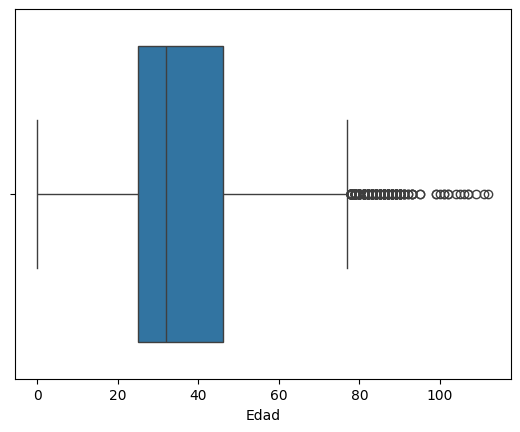

In [ ]:
# Crear un boxplot.
Numericas['Edad']
sns.boxplot(x=Numericas['Edad'])
# Mostrar el gráfico.
plt.show()

In [ ]:
# Calcular el rango intercuartílico (IQR)
Q1 = df['Edad'].quantile(0.25)
Q3 = df['Edad'].quantile(0.75)
IQR = Q3 - Q1

# Calcular límites para detectar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar outliers
outliers = df[(df['Edad'] < lower_bound) | (df['Edad'] > upper_bound)]
outliers_list = outliers['Edad'].tolist()
print(sorted(outliers_list))
len(outliers_list)
# Aunque hay presencia de valores atípicos, no hay valores fuera de lo normal en cuanto a la edad.

[78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.

403

En este diagrama de caja, podemos ver de forma inmediata que la mediana de la edad de las personas accidentadas se encuentra al rededor de los 30 años, por lo que la mitad de las personas invoilucradas en un siniestro vial están por debajo de los 30 años.

El rango normal de edad está entre los 0 y los 78 año.

Además, la mayoría de las personas accidentadas están entre los 25 y los 46 años.

También se detecta presencia de 403 outliers, sin embargo estos valores no están fuera de lo normal respecto a la edad de una persona.


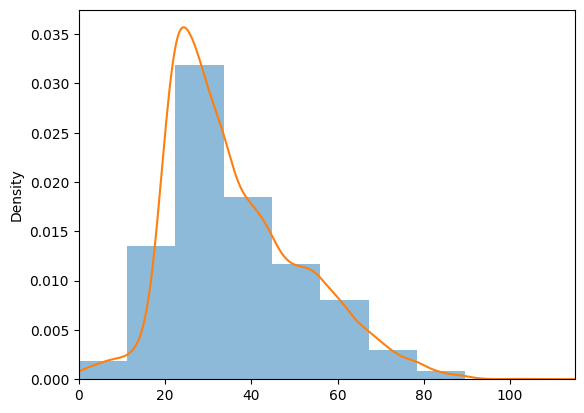

In [ ]:
# Histograma de frecuencias para edad
ax = Numericas['Edad'].plot.hist(density=True, xlim=[0,115], bins=10, alpha=0.5)
Numericas['Edad'].plot.density(ax=ax)
plt.show()

A partir del histograma de frecuencias podemos notar que la edad está sesgada hacia la derecha, esto indica que hay una mayor cantidad de personas jóvenes involucradas en accidentes de tránsito que personas mayores.

# Analisis de distribucion de la variable edad

Para evaluar la normalidad de la variable "Edad", realizamos tanto un gráfico QQ como las pruebas estadísticas de Shapiro-Wilk y Kolmogorov-Smirnov. Utilizamos la librería scipy.stats: para el gráfico QQ se empleó la función probplot(), para la prueba de Shapiro-Wilk la función shapiro(), y para la prueba de Kolmogorov-Smirnov la función kstest().

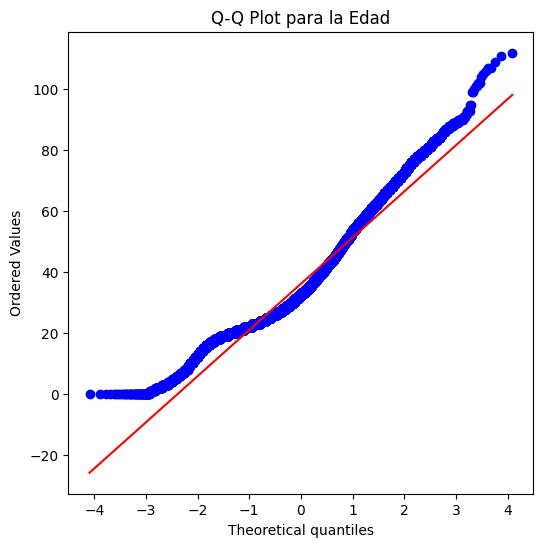

In [ ]:

# Q-Q Plot para la variable 'Edad'
plt.figure(figsize=(6, 6))
stats.probplot(Numericas['Edad'], dist="norm", plot=plt)
plt.title("Q-Q Plot para la Edad")
plt.show()

In [ ]:
# Prueba de Shapiro-Wilk para la normalidad
shapiro_test = stats.shapiro(Numericas['Edad'])
print("Prueba de Shapiro-Wilk:")
print(f"Estadístico: {shapiro_test.statistic}, p-valor: {shapiro_test.pvalue}")

# Prueba de Kolmogorov-Smirnov para la normalidad
edad_normalizada = (Numericas['Edad'] - Numericas['Edad'].mean()) / Numericas['Edad'].std()
ks_test = stats.kstest(edad_normalizada, 'norm')
print("\nPrueba de Kolmogorov-Smirnov:")
print(f"Estadístico: {ks_test.statistic}, p-valor: {ks_test.pvalue}")

Prueba de Shapiro-Wilk:
Estadístico: 0.9502521625605057, p-valor: 1.8003941383864703e-71

Prueba de Kolmogorov-Smirnov:
Estadístico: 0.10860463052628905, p-valor: 0.0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 32237.
  res = hypotest_fun_out(*samples, **kwds)


El QQ plot muestra un desvío considerable de los puntos respecto a la línea roja en los extremos, lo que indica que "Edad" no sigue una distribución normal. Esto es coherente con el histograma de frecuencias, donde se observa una distribución sesgada a la derecha.

Además, los valores p obtenidos en las pruebas de Shapiro-Wilk y Kolmogorov-Smirnov son menores a 0.05, indicando que rechazamos la hipótesis nula de normalidad con un 95% de confianza. Con estos resultados, podemos concluir que la variable "Edad" no sigue una distribución normal.

# Analisis de Columnas Categoricas

Para el análisis descriptivo de las columnas categóricas, se utilizaron gráficos de frecuencias mediante la librería matplotlib.pyplot, utilizando la función .bar()para visualizar el comportamiento de cada uno de los posibles valores de cada columna. Este análisis no solo permitió observar la distribución de las categorías, sino que también facilitó la reducción de los posibles valores en algunas variables. Al identificar categorías con pocos registros o con interpretaciones similares, se pudo agrupar o simplificar ciertos resultados, lo que puede ser útil para reducir la complejidad de los modelos de entrenamiento y mejorar su rendimiento en futuras etapas.

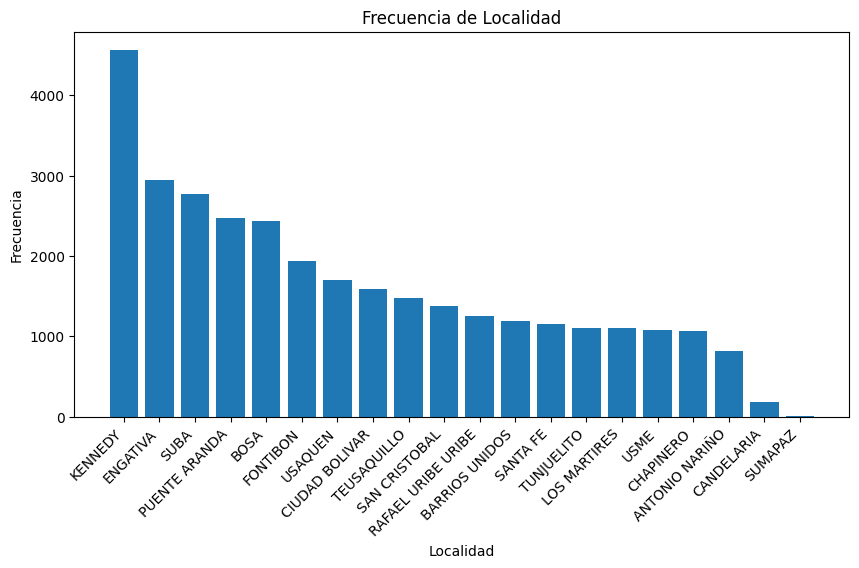

Frecuencias de Localidad:
Localidad
KENNEDY               4560
ENGATIVA              2940
SUBA                  2768
PUENTE ARANDA         2470
BOSA                  2437
FONTIBON              1937
USAQUEN               1704
CIUDAD BOLIVAR        1594
TEUSAQUILLO           1476
SAN CRISTOBAL         1380
RAFAEL URIBE URIBE    1257
BARRIOS UNIDOS        1192
SANTA FE              1155
TUNJUELITO            1107
LOS MARTIRES          1099
USME                  1082
CHAPINERO             1071
ANTONIO NARIÑO         814
CANDELARIA             188
SUMAPAZ                  6
Name: count, dtype: int64




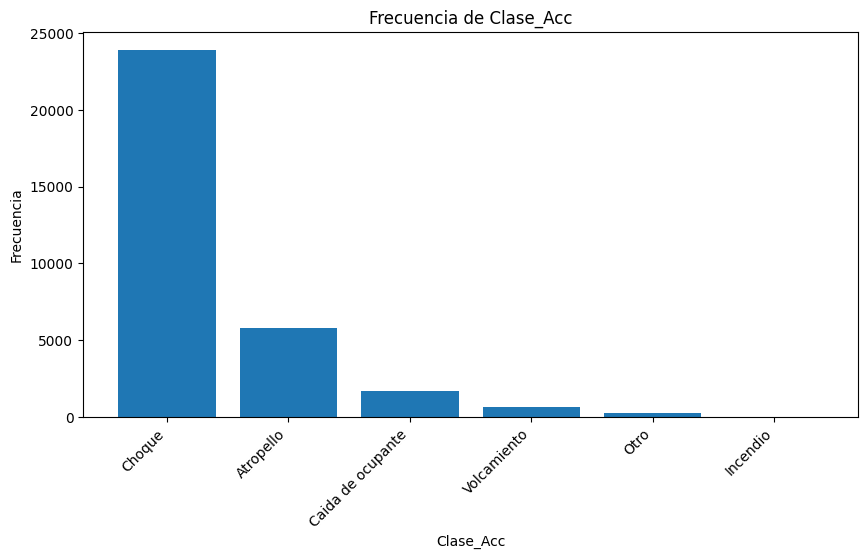

Frecuencias de Clase_Acc:
Clase_Acc
Choque               23866
Atropello             5774
Caida de ocupante     1699
Volcamiento            626
Otro                   266
Incendio                 6
Name: count, dtype: int64




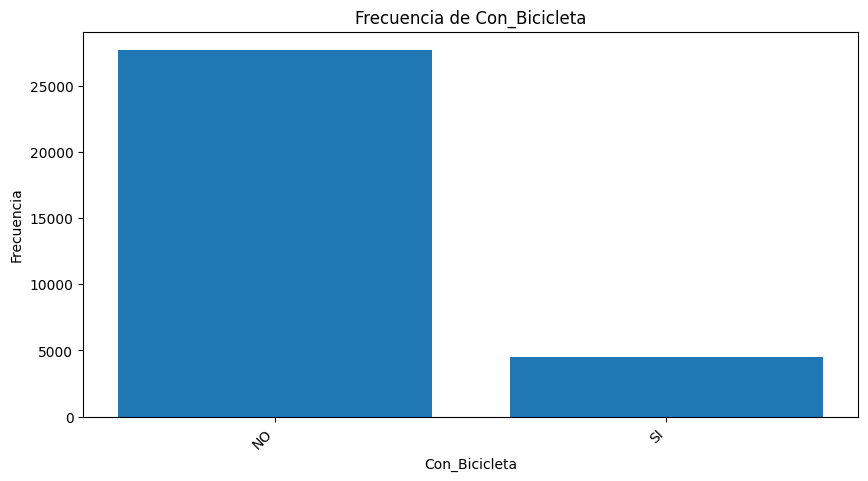

Frecuencias de Con_Bicicleta:
Con_Bicicleta
NO    27706
SI     4531
Name: count, dtype: int64




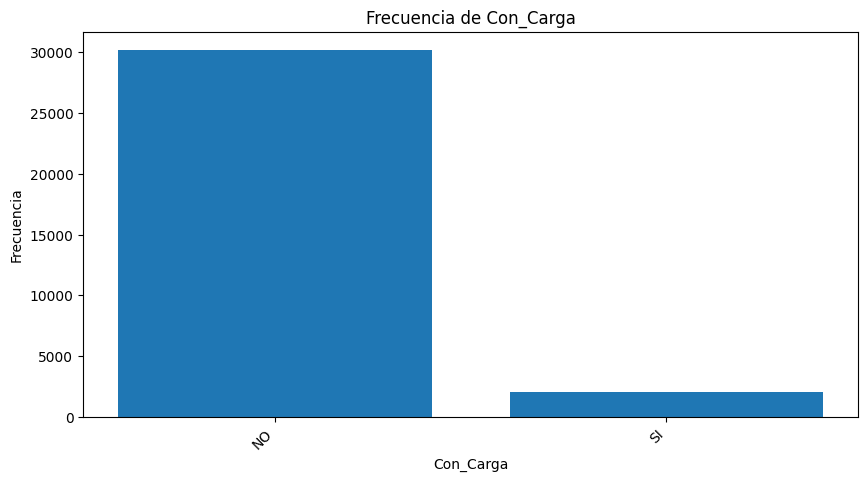

Frecuencias de Con_Carga:
Con_Carga
NO    30188
SI     2049
Name: count, dtype: int64




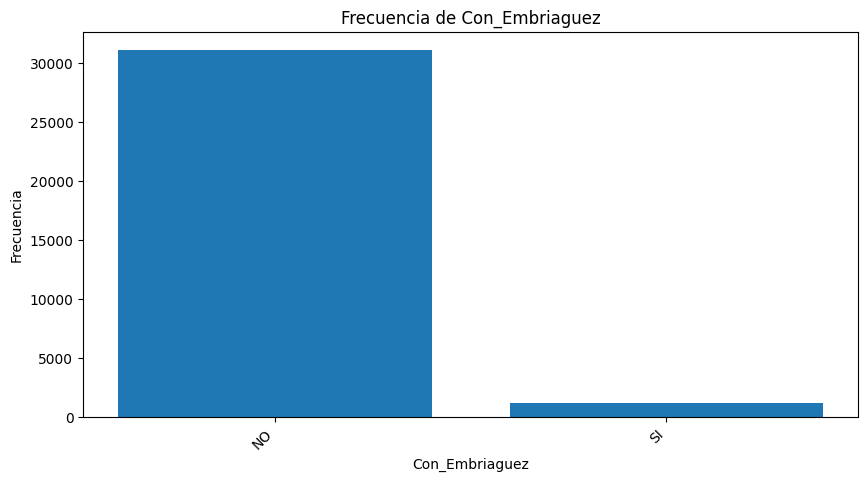

Frecuencias de Con_Embriaguez:
Con_Embriaguez
NO    31103
SI     1134
Name: count, dtype: int64




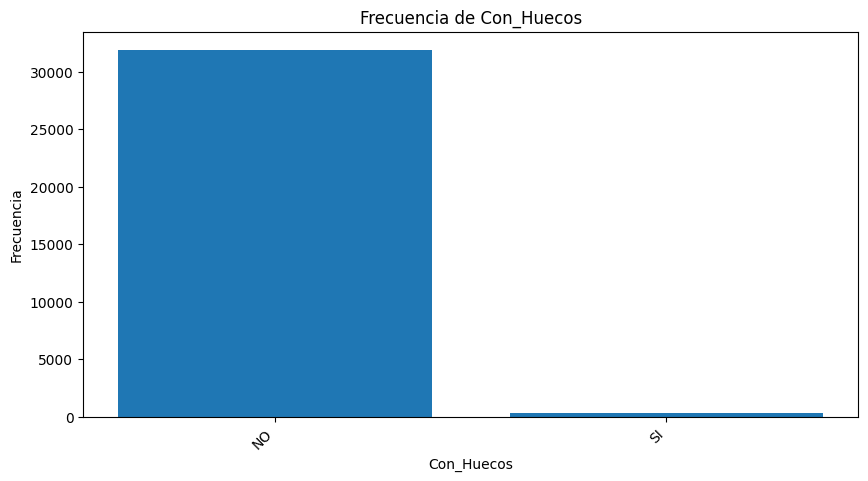

Frecuencias de Con_Huecos:
Con_Huecos
NO    31901
SI      336
Name: count, dtype: int64




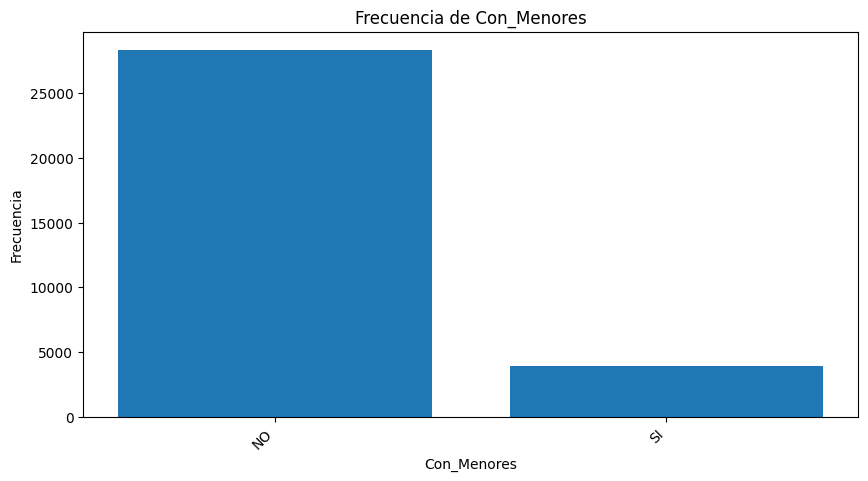

Frecuencias de Con_Menores:
Con_Menores
NO    28315
SI     3922
Name: count, dtype: int64




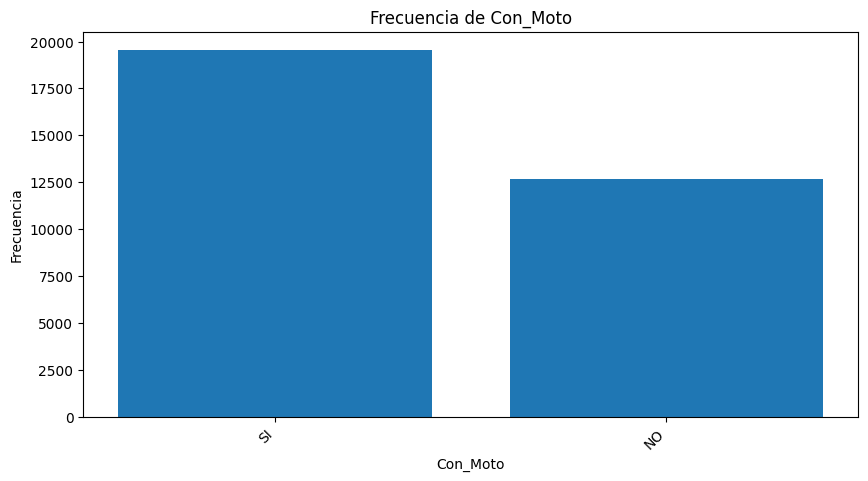

Frecuencias de Con_Moto:
Con_Moto
SI    19543
NO    12694
Name: count, dtype: int64




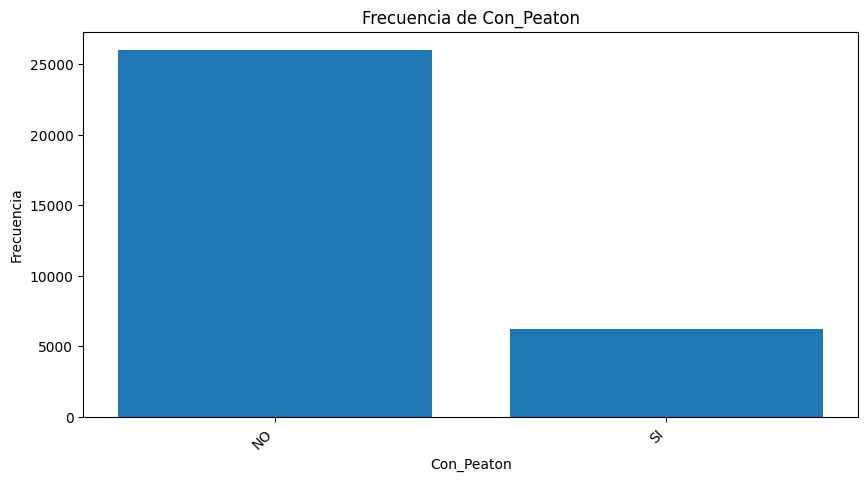

Frecuencias de Con_Peaton:
Con_Peaton
NO    25990
SI     6247
Name: count, dtype: int64




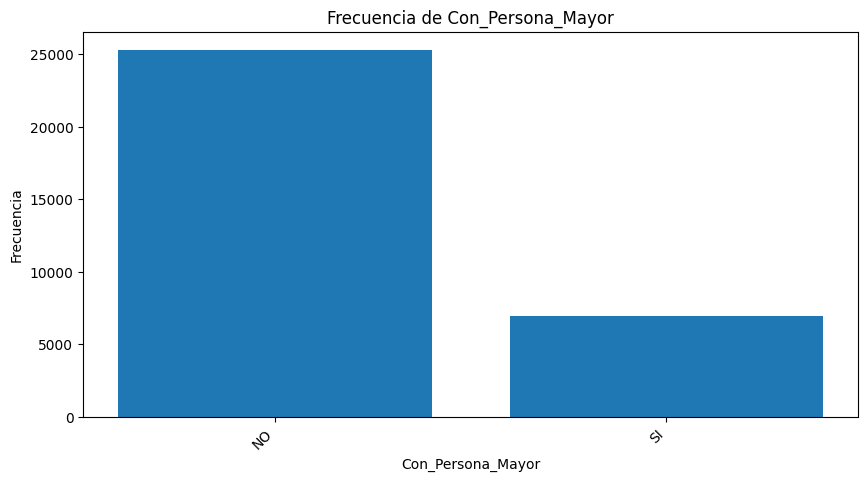

Frecuencias de Con_Persona_Mayor:
Con_Persona_Mayor
NO    25297
SI     6940
Name: count, dtype: int64




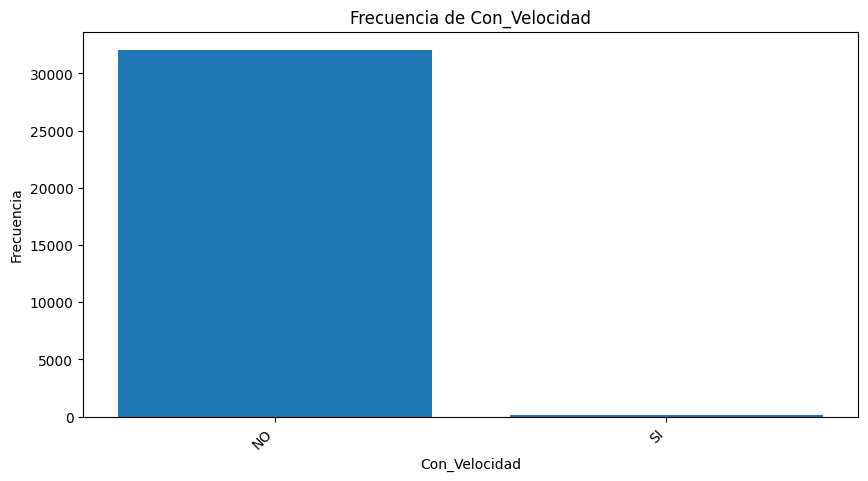

Frecuencias de Con_Velocidad:
Con_Velocidad
NO    32050
SI      187
Name: count, dtype: int64




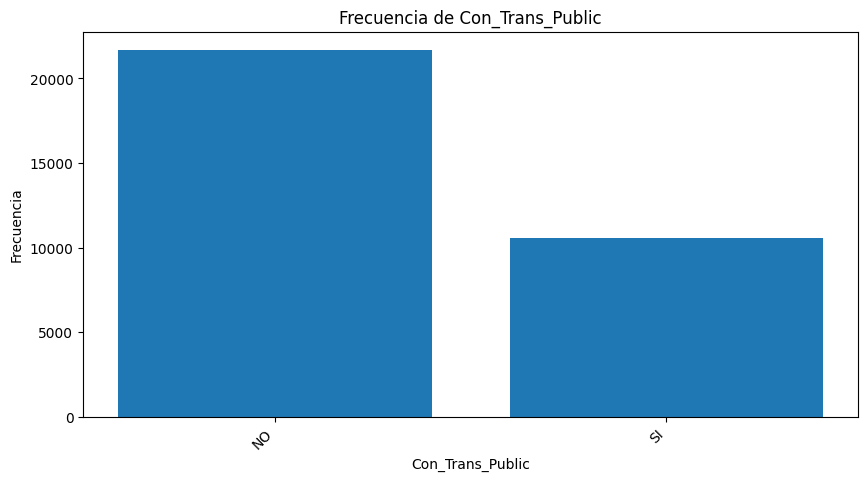

Frecuencias de Con_Trans_Public:
Con_Trans_Public
NO    21677
SI    10560
Name: count, dtype: int64




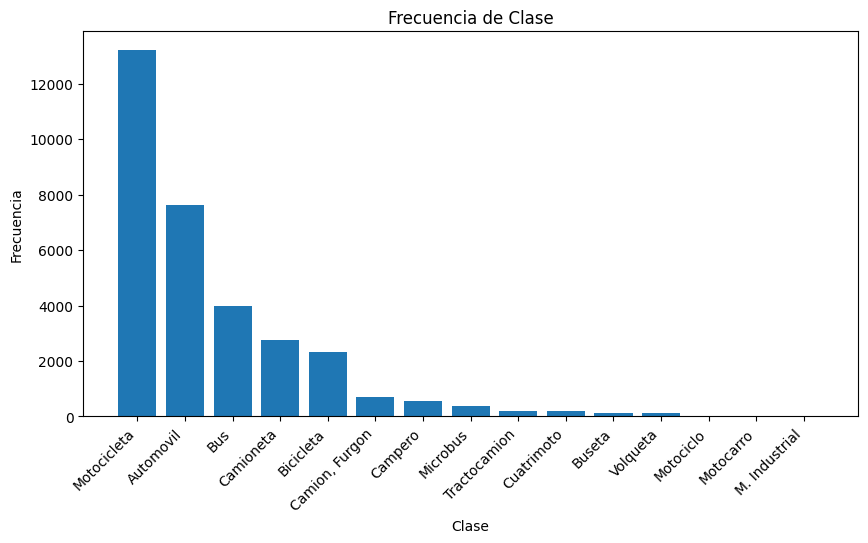

Frecuencias de Clase:
Clase
Motocicleta       13220
Automovil          7612
Bus                3979
Camioneta          2761
Bicicleta          2325
Camion, Furgon      702
Campero             573
Microbus            376
Tractocamion        187
Cuatrimoto          187
Buseta              142
Volqueta            122
Motociclo            29
Motocarro            16
M. Industrial         6
Name: count, dtype: int64




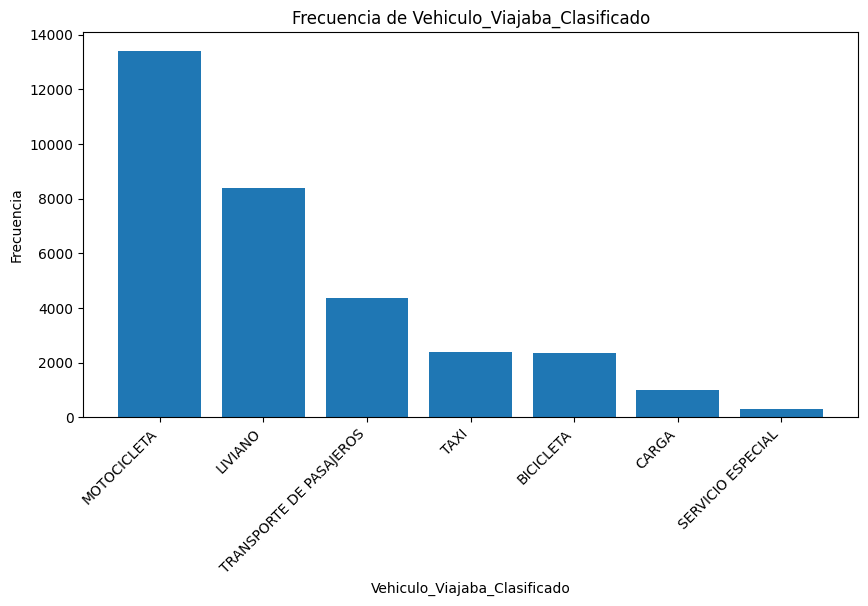

Frecuencias de Vehiculo_Viajaba_Clasificado:
Vehiculo_Viajaba_Clasificado
MOTOCICLETA                13423
LIVIANO                     8412
TRANSPORTE DE PASAJEROS     4350
TAXI                        2388
BICICLETA                   2354
CARGA                       1017
SERVICIO ESPECIAL            293
Name: count, dtype: int64




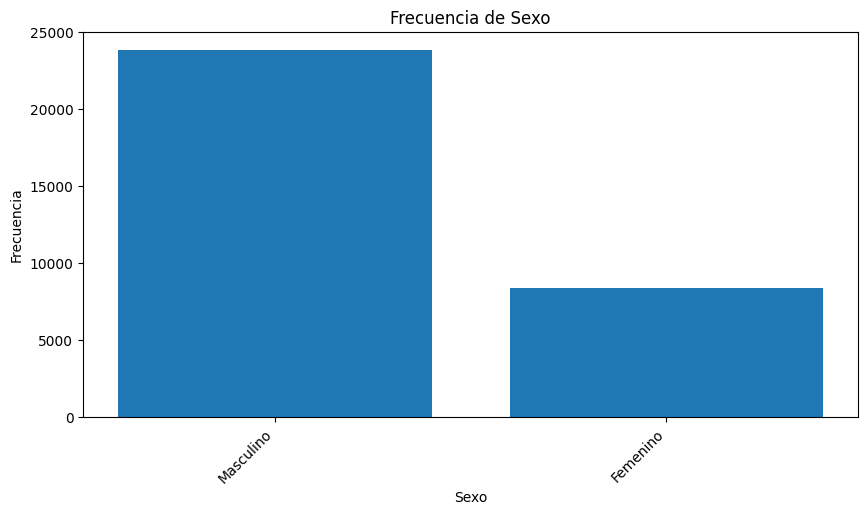

Frecuencias de Sexo:
Sexo
Masculino    23828
Femenino      8409
Name: count, dtype: int64




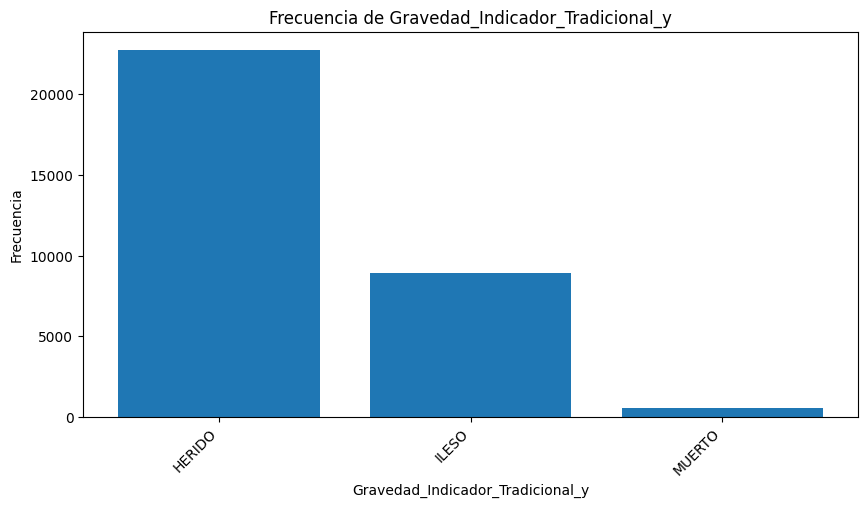

Frecuencias de Gravedad_Indicador_Tradicional_y:
Gravedad_Indicador_Tradicional_y
HERIDO    22734
ILESO      8962
MUERTO      541
Name: count, dtype: int64




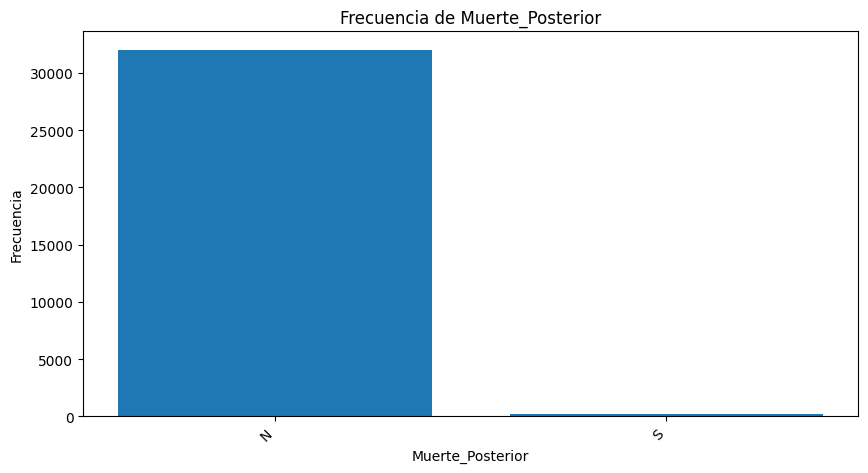

Frecuencias de Muerte_Posterior:
Muerte_Posterior
N    32031
S      206
Name: count, dtype: int64




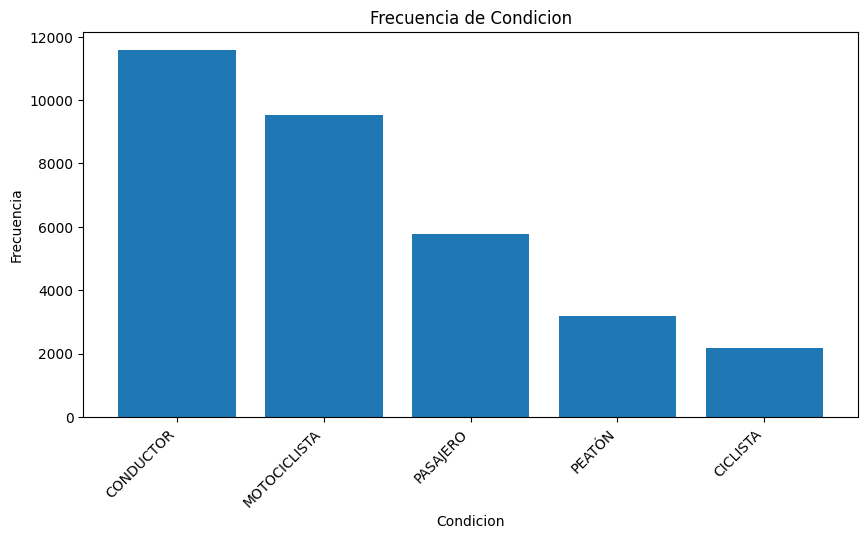

Frecuencias de Condicion:
Condicion
CONDUCTOR       11569
MOTOCICLISTA     9520
PASAJERO         5779
PEATÓN           3187
CICLISTA         2182
Name: count, dtype: int64




In [ ]:
#  Gráficos de frecuencias de cada una de las columnas del dataframe categóricas.


for column in Categoricas.columns:
  # Calcular las frecuencias
  frecuencias = Categoricas[column].value_counts()

  # Crear el gráfico de barras.
  plt.figure(figsize=(10, 5))
  plt.bar(frecuencias.index, frecuencias.values)
  plt.title(f'Frecuencia de {column}')
  plt.xlabel(column)
  plt.ylabel('Frecuencia')
  plt.xticks(rotation=45, ha='right')
  plt.show()

  # Imprimir las frecuencias en número
  print(f"Frecuencias de {column}:")
  print(frecuencias)
  print("\n")

A partir del análisis realizado con los gráficos de barras, se obtuvieron las siguientes conclusiones:

**Localidades** : El gráfico de barras de localidades muestra que Kennedy es la zona con la mayor cantidad de accidentes de tránsito, mientras que Sumapaz presenta la menor cantidad. Además, las cinco localidades con más personas involucradas en accidentes son Kennedy, Engativá, Suba, Puente Aranda y Bosa , las cuales concentran el 47% del total de incidentes registrados.

**Tipo de Accidente (Clase_Acc)** : En el gráfico relacionado con la Clase de Accidente , se observa una clara predominancia de choques , que representa el 74% de los incidentes. Los atropellos ocupan el segundo lugar, con un 18% de los casos.

**Involucrados por tipo de vehículo y condición**: Los gráficos sobre la frecuencia de vehículos clasificados y la condición de los accidentes revelan un patrón destacado: la mayoría de las personas involucradas en accidentes fueron motociclistas .

**Gravedad de los Accidentes** : En cuanto a la gravedad de los accidentes , se observa que el 71% de las personas resultaron heridas , el 28% fueron ilesas y solo en un 1% delos casos hubo algún fallecido . Esta distribución muestra que la variable de gravedad está desbalanceada, con una gran mayoría de accidentes que no resultan en víctimas fatales.

Como resultado del análisis de frecuencias anterior, algunos campos del dataframe cuya frecuencia era muy baja fueron agregados en una sola variable para reducir la dimensionalidad del conjunto de datos.  

In [ ]:
#Debido a la poca frecuencia del valor 'Otro' e 'Incendio' en el campo 'Frecuencias de Clase_Acc', se unen para reducir la cardinalidad en 'Otros'
df['Clase_Acc']=df['Clase_Acc'].replace({'Incendio':'Otros','Otro':'Otros','Volcamiento':'Otros'})


In [ ]:
# Se reduce la cardinalidad de 'Vehiculo_Viajaba_Clasificado' agrupando
# En la categoría 'Transporte público', se agrupan los vehículos 'TRANSPORTE DE PASAJEROS' y 'SERVICIO ESPECIAL'
df['Vehiculo_Viajaba_Clasificado']= df['Vehiculo_Viajaba_Clasificado'].replace({'TRANSPORTE DE PASAJEROS':'TRANSPORTE PUBLICO','SERVICIO ESPECIAL':'TRANSPORTE PUBLICO'})



In [ ]:
# En la categoría 'Moto', se agrupan 'Camión', 'Furgón' y 'Motociclo'
df['Clase']=df['Clase'].replace({'Motocicleta':'Moto','Motociclo':'Moto'})

#En la categoría 'Camión', se agrupan 'Camión', 'Furgón', 'Tractocamión', 'Volqueta', 'Campero' y 'Camioneta'
df['Clase']=df['Clase'].replace({'Camion, Furgon':'Camion','Tractocamion':'Camion','Volqueta':'Camion','Campero':'Camion','Camioneta':'Camion'})

#En la categoría 'Transporte Público', se agrupan 'Bus', 'Microbús' y 'Buseta'
df['Clase']=df['Clase'].replace({'Bus':'Transporte público','Microbus':'Transporte público','Buseta':'Transporte público'})

#En la categoría 'Otros', se agrupan 'No identificado', 'Motocarro', 'M. Industrial', 'M. Agrícola' y 'Tracción animal''
df['Clase']=df['Clase'].replace({'No identificado':'Otros','Motocarro':'Otros','M. Industrial':'Otros','M. Agricola':'Otros','Traccion animal':'Otros','Cuatrimoto':'Otros'})

En los siguientes graficos puede notarse esa agrupación de variables

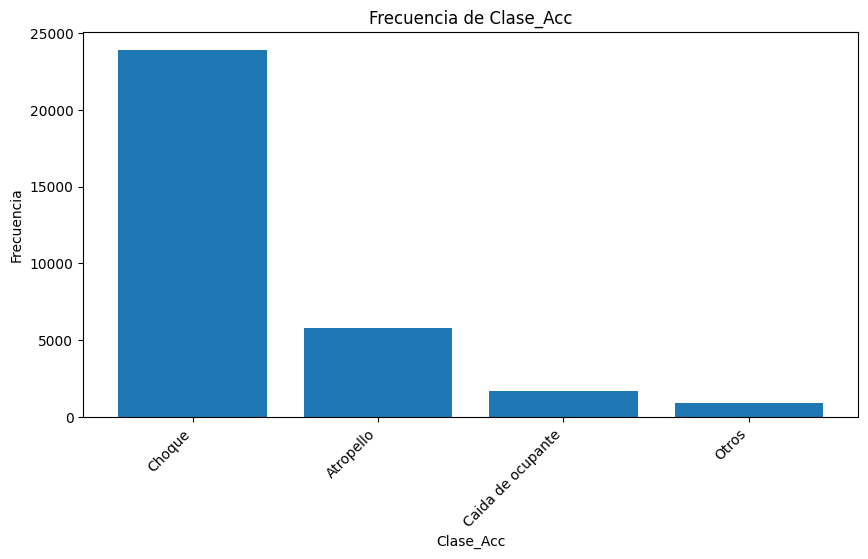

Frecuencias de Clase_Acc:
Clase_Acc
Choque               23866
Atropello             5774
Caida de ocupante     1699
Otros                  898
Name: count, dtype: int64




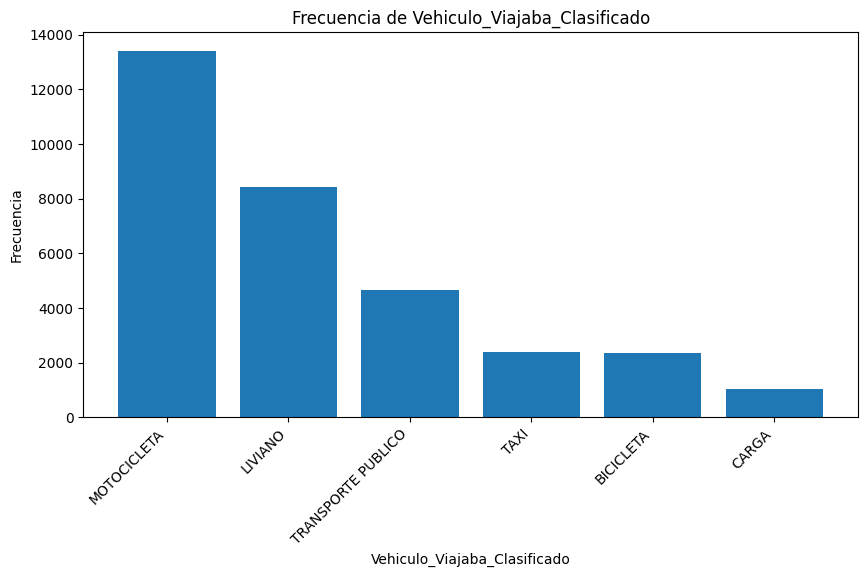

Frecuencias de Vehiculo_Viajaba_Clasificado:
Vehiculo_Viajaba_Clasificado
MOTOCICLETA           13423
LIVIANO                8412
TRANSPORTE PUBLICO     4643
TAXI                   2388
BICICLETA              2354
CARGA                  1017
Name: count, dtype: int64




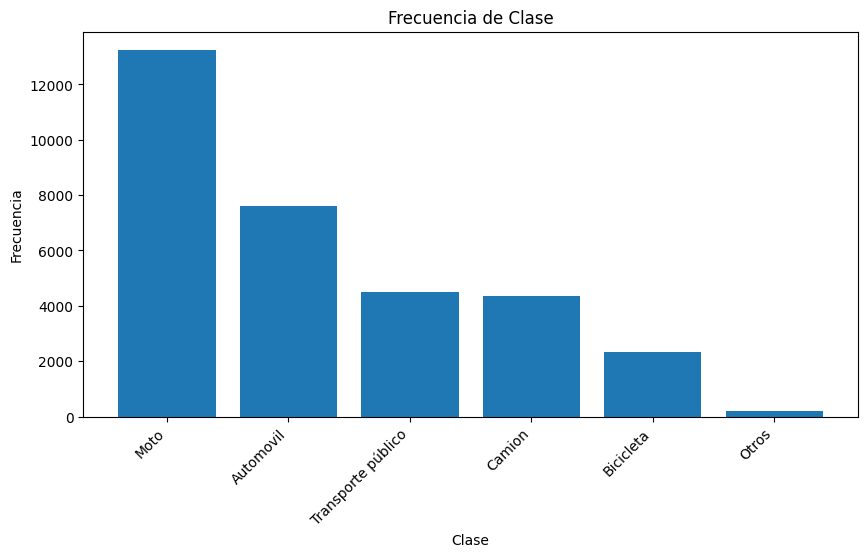

Frecuencias de Clase:
Clase
Moto                  13249
Automovil              7612
Transporte público     4497
Camion                 4345
Bicicleta              2325
Otros                   209
Name: count, dtype: int64




In [ ]:
#  graficos de frecuencias de cada una de las columnas del dataframe  df ademas dame las frecuencias en numero de cada valor

columns_to_analyze = ['Clase_Acc', 'Vehiculo_Viajaba_Clasificado', 'Clase']

for column in columns_to_analyze:
  # Calcular las frecuencias
  frecuencias = df[column].value_counts()

  # Crear el gráfico de barras
  plt.figure(figsize=(10, 5))
  plt.bar(frecuencias.index, frecuencias.values)
  plt.title(f'Frecuencia de {column}')
  plt.xlabel(column)
  plt.ylabel('Frecuencia')
  plt.xticks(rotation=45, ha='right')
  plt.show()

  # Imprimir las frecuencias en número
  print(f"Frecuencias de {column}:")
  print(frecuencias)
  print("\n")

In [ ]:
# Data frame para muestra (copia de df)
df2 = df

# Preparación de dataframe para modelación de la gravedad delos accidentes





En esta etapa, se prepara el marco de datos para predecir la gravedad de los accidentes. Se siguen estos pasos:


1.   **Selección de variables** : Se crean dos listas con las columnas categóricas  
     y numéricas relevantes para la modelación.


*   Las categóricas incluyen columnas de tipo objecty category, pero se excluyen Hora_Min_Accy la variable de salida ('Gravedad_Indicador_Tradicional_y') .
*   Las numéricas incluyen columnas de tipo float64, int32, e int64, excluyendo Longitud, Latitud y Codigo_Accidente ya que no son necesarias para la prediccion de la gravedad.



2.   **Codificación y Estandarización** :



*   Se codifican las variables categóricas utilizando One Hot Encoding de Scikit-learn.
*   La columna Edad se estandariza con StandardScaler de Scikit-learn.



3.   **Actualización del DataFrame** : Se eliminan las columnas originales no transformadas con drop, y las nuevas columnas codificadas y estandarizadas se añaden usando join.


Este proceso garantiza que los datos estén listos para ser usados ​​en los modelos predictivos.

In [ ]:
#Lista de variables categóricas
Columnas_categoricas = df.select_dtypes(include = ["object", 'category']).columns.tolist()
# Remover 'Hora_Min_Acc' from the list
Columnas_categoricas.remove('Hora_Min_Acc')
# Remover columna 'Gravedad_Indicador_Tradicional_y' ya que es la columna a predecir
Columnas_categoricas.remove('Gravedad_Indicador_Tradicional_y')

# Lista de columnas numéricas
Columnas_numericas=df.select_dtypes(include = ['float64','int32','int64']).columns.tolist()
Columnas_numericas.remove('Longitud')
Columnas_numericas.remove('Latitud')
Columnas_numericas.remove('Codigo_Accidente')

In [ ]:

# Inicializar el OneHotEncoder
encoder = OneHotEncoder(drop='first',sparse_output=False)

# Aplicar el OneHotEncoder a todas las columnas categoricas y crear Dataframe de columnas Categoricas
codificacion = encoder.fit_transform(df[Columnas_categoricas])

X_categoricas=pd.DataFrame(codificacion,columns=encoder.get_feature_names_out(Columnas_categoricas))

# Estandarizar la variable numérica
scaler = StandardScaler()
X_numericas = scaler.fit_transform(df[['Edad']])


# Creación de un DataFrame de columnas numéricas

X_numericas=pd.DataFrame(X_numericas,columns=['Edad'])

#Reemplazar las columnas codificadas y estandarizadas en el DataFrame df

df=df.drop(columns=Columnas_categoricas).join(X_categoricas)

df=df.drop(columns=Columnas_numericas).join(X_numericas)

**Data Frame para clasificación**

In [ ]:
# DataFrame de trabajo para la gravedad de accidentes.
excluidos=['Codigo_Accidente','Localidad','Longitud','Latitud','Fecha_Acc','Hora_Min_Acc']
df=df[df.columns[~df.columns.isin(excluidos)]]
df


,Gravedad_Indicador_Tradicional_y,Localidad_BARRIOS UNIDOS,Localidad_BOSA,Localidad_CANDELARIA,Localidad_CHAPINERO,Localidad_CIUDAD BOLIVAR,Localidad_ENGATIVA,Localidad_FONTIBON,Localidad_KENNEDY,Localidad_LOS MARTIRES,...,Vehiculo_Viajaba_Clasificado_MOTOCICLETA,Vehiculo_Viajaba_Clasificado_TAXI,Vehiculo_Viajaba_Clasificado_TRANSPORTE PUBLICO,Sexo_Masculino,Muerte_Posterior_S,Condicion_CONDUCTOR,Condicion_MOTOCICLISTA,Condicion_PASAJERO,Condicion_PEATÓN,Edad
0,ILESO,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.376968
1,HERIDO,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.845017
2,HERIDO,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.459127
3,HERIDO,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.845017
4,HERIDO,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.698543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32232,HERIDO,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.242104
32233,ILESO,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.248338
32234,ILESO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.470324
32235,HERIDO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.780702


## División de los datos para la predicción de la gravedad

En esta etapa, se realiza la división de los datos para el entrenamiento y la prueba del modelo. Primero, se lleva a cabo el Label Encoding de la variable de salida (gravedad), utilizando la función LabelEncoder().fit_transform() de la librería sklearn.preprocessing . Es importante destacar que para algunos modelos categóricos, como la regresión logística, este paso no es necesario, ya que pueden manejar las variables categóricas de manera directa.
Sin embargo, en modelos de Random Forest, la variable de salida si debe codificarse en caso de ser categórica.

A continuación, se divide el conjunto de datos en dos subconjuntos: 80% para entrenamiento y 20% para prueba . Esto se hace de forma aleatoria utilizando la función train_test_split de la librería Scikit-learn .

In [ ]:
# Se establece las variables de entrada 'X' y la variable de salida 'y'
X = df.drop(columns ='Gravedad_Indicador_Tradicional_y')
y = df['Gravedad_Indicador_Tradicional_y']

In [ ]:
# Se utiliza LabelEncoder para transformar las categorías de la variable de salida a variables numericas

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = pd.DataFrame(y)

0 = Heridos

1 = Ilesos

2 = Muertos

In [ ]:
y.value_counts()

,count
0,
0,22734
1,8962
2,541


In [ ]:
# Se crean los datasets de entrenamiento y prueba para las variables de entrada y salida

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 123,
                                        shuffle      = True
                                    )

## Preparación del DataFrame para la predicción de la Frecuencia de Accidentes por día (Series de tiempo)

Para la predicción de la frecuencia de accidentes por día y por localidad, primero seleccionamos las columnas relevantes: la fecha del accidente ( Fecha_Acc) y la localidad ( Localidad). Esto es necesario, ya que queremos predecir la cantidad de personas involucradas en accidentes por día y por localidad.


1.   **Agrupación por Fecha y Localidad** : Usamos la función groupby de pandas para agrupar los datos por fecha y localidad. Luego, aplicamos la función de agregación size()para obtener la cantidad de personas involucradas en accidentes para cada combinación de fecha y localidad.

2.   **Transformación a un Formato de Series de Tiempo** : Dado que las series de tiempo funcionan mejor con DataFrames sin índices múltiples y con continuidad, utilizamos unstack() para transformar la segunda columna del índice ( Localidad) en columnas. Además, rellenamos las combinaciones faltantes con un valor de 0 utilizando fill_value=0, asegurando que no haya valores faltantes.


4.   **creamos la columna Dia_semana**: con .day_name(), que devuelve el nombre del día de la semana para cada fecha (requiere que Fecha_Accsea de tipo datetime). Si es necesario, convertimos Fecha_Acccon pd.to_datetime().


3.   **División de Datos en Entrenamiento y Prueba** : Para la predicción de la frecuencia de accidentes, separamos los datos en dos conjuntos: uno para entrenamiento y otro para prueba. Utilizamos los primeros 9 meses del año para el entrenamiento y los últimos 3 meses para la prueba. Esto se realiza mediante mascaras de fechas




In [ ]:
df3 = df2[['Fecha_Acc','Localidad']]


In [ ]:
# Agrupar por fecha y localidad y contar el número de personas involucradas en accidentes
localidad_por_fecha = df3.groupby(['Fecha_Acc', 'Localidad']).size().unstack(fill_value=0)
localidad_por_fecha['Dia_semana']=localidad_por_fecha.index.day_name()
dia=localidad_por_fecha.pop('Dia_semana')
localidad_por_fecha.insert(0, 'Dia_semana', dia)
localidad_por_fecha.columns.name = None


In [ ]:
localidad_por_fecha

,Dia_semana,ANTONIO NARIÑO,BARRIOS UNIDOS,BOSA,CANDELARIA,CHAPINERO,CIUDAD BOLIVAR,ENGATIVA,FONTIBON,KENNEDY,...,PUENTE ARANDA,RAFAEL URIBE URIBE,SAN CRISTOBAL,SANTA FE,SUBA,SUMAPAZ,TEUSAQUILLO,TUNJUELITO,USAQUEN,USME
Fecha_Acc,,,,,,,,,,,,,,,,,,,,,
2023-01-01,Sunday,0,2,6,0,0,3,5,0,11,...,9,10,0,3,9,0,0,0,0,2
2023-01-02,Monday,8,0,7,0,2,2,8,9,10,...,5,0,0,2,3,0,1,3,0,0
2023-01-03,Tuesday,4,2,5,0,0,2,3,10,7,...,4,0,2,0,9,0,2,2,4,0
2023-01-04,Wednesday,2,0,5,0,0,2,8,3,7,...,6,2,0,1,12,0,0,7,4,4
2023-01-05,Thursday,0,6,3,0,7,0,6,9,6,...,3,6,0,5,5,0,1,4,5,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,Wednesday,0,0,2,0,5,9,5,12,17,...,3,4,11,2,6,0,2,2,2,3
2023-12-28,Thursday,0,5,7,0,0,8,5,5,8,...,4,0,6,2,9,0,4,4,7,0
2023-12-29,Friday,3,0,10,0,0,2,10,5,12,...,4,13,3,7,4,0,5,0,0,5


In [ ]:
#data frame de entrenamiento y dataframe de pueba
Fecha_division='2023-10-01'
df_train_series_tiempo=localidad_por_fecha.loc[localidad_por_fecha.index < Fecha_division]
df_test_series_tiempo=localidad_por_fecha.loc[localidad_por_fecha.index >= Fecha_division]

In [ ]:
df_train_series_tiempo

,Dia_semana,ANTONIO NARIÑO,BARRIOS UNIDOS,BOSA,CANDELARIA,CHAPINERO,CIUDAD BOLIVAR,ENGATIVA,FONTIBON,KENNEDY,...,PUENTE ARANDA,RAFAEL URIBE URIBE,SAN CRISTOBAL,SANTA FE,SUBA,SUMAPAZ,TEUSAQUILLO,TUNJUELITO,USAQUEN,USME
Fecha_Acc,,,,,,,,,,,,,,,,,,,,,
2023-01-01,Sunday,0,2,6,0,0,3,5,0,11,...,9,10,0,3,9,0,0,0,0,2
2023-01-02,Monday,8,0,7,0,2,2,8,9,10,...,5,0,0,2,3,0,1,3,0,0
2023-01-03,Tuesday,4,2,5,0,0,2,3,10,7,...,4,0,2,0,9,0,2,2,4,0
2023-01-04,Wednesday,2,0,5,0,0,2,8,3,7,...,6,2,0,1,12,0,0,7,4,4
2023-01-05,Thursday,0,6,3,0,7,0,6,9,6,...,3,6,0,5,5,0,1,4,5,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-26,Tuesday,8,4,13,0,2,1,10,5,12,...,2,2,7,2,6,0,0,2,4,4
2023-09-27,Wednesday,4,2,4,2,4,10,4,2,8,...,2,6,0,0,12,0,2,3,3,7
2023-09-28,Thursday,4,7,16,1,3,2,3,8,6,...,16,10,2,0,8,0,4,1,4,7


In [ ]:
df_test_series_tiempo

,Dia_semana,ANTONIO NARIÑO,BARRIOS UNIDOS,BOSA,CANDELARIA,CHAPINERO,CIUDAD BOLIVAR,ENGATIVA,FONTIBON,KENNEDY,...,PUENTE ARANDA,RAFAEL URIBE URIBE,SAN CRISTOBAL,SANTA FE,SUBA,SUMAPAZ,TEUSAQUILLO,TUNJUELITO,USAQUEN,USME
Fecha_Acc,,,,,,,,,,,,,,,,,,,,,
2023-10-01,Sunday,2,8,7,0,0,10,11,10,10,...,4,5,0,0,5,0,0,0,2,5
2023-10-02,Monday,0,4,6,0,6,7,3,8,9,...,13,3,4,0,11,0,0,2,0,3
2023-10-03,Tuesday,7,2,8,0,10,4,10,6,22,...,5,6,2,3,10,0,0,4,11,4
2023-10-04,Wednesday,3,4,2,0,4,7,8,4,8,...,5,0,5,2,7,0,5,2,3,2
2023-10-05,Thursday,6,6,15,0,0,4,4,0,8,...,11,2,4,4,9,0,3,0,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,Wednesday,0,0,2,0,5,9,5,12,17,...,3,4,11,2,6,0,2,2,2,3
2023-12-28,Thursday,0,5,7,0,0,8,5,5,8,...,4,0,6,2,9,0,4,4,7,0
2023-12-29,Friday,3,0,10,0,0,2,10,5,12,...,4,13,3,7,4,0,5,0,0,5


In [ ]:
DF4=localidad_por_fecha.reset_index()
DF4['Fecha_Acc']=DF4['Fecha_Acc'].dt.date



In [ ]:
Personas_accidentadas_dia=df3.groupby('Fecha_Acc').size()
Personas_accidentadas_dia.name='Personas_accidentadas_por_dia'
Personas_accidentadas_dia= Personas_accidentadas_dia.reset_index()


# Analitica descriptiva de la serie de tiempo

Este análisis descriptivo examina la frecuencia de personas accidentadas en Bogotá durante el año 2023, explorando aspectos clave de la serie temporal. Se estudia la tendencia para identificar patrones generales de aumento o disminución en los accidentes; la estacionalidad para detectar repeticiones periódicas en los datos; la variabilidad y volatilidad para medir la dispersión y fluctuaciones diarias; la autocorrelación para analizar relaciones con valores pasados; y las anomalías y picos para destacar eventos inusuales o extremos. Esto permite comprender mejor los patrones y dinámicas de los accidentes en este período.

# Tendencia





Las funciones utilizadas secuencialmente para analizar la tendencia son:
*   pd.to_datetime: Convierte la columna Fecha_Acc al formato de fecha, lo que permite manejar los datos como una serie temporal.
*   set_index: Establece Fecha_Acc como índice para organizar los datos por tiempo.
*   rolling(window=30).mean(): Calcula un medio móvil de 30 días, que suaviza la serie y resalta la tendencia general.
*  plt.plot: Se utiliza para graficar tanto los datos diarios como la media móvil en una misma figura.





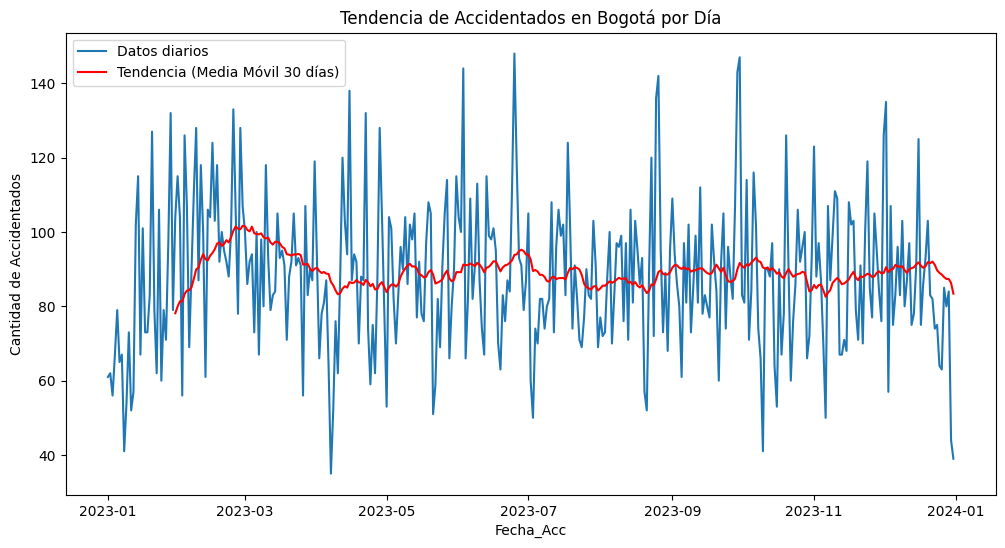

In [ ]:

Personas_accidentadas_dia['Fecha_Acc'] = pd.to_datetime(Personas_accidentadas_dia['Fecha_Acc'])
Personas_accidentadas_dia.set_index('Fecha_Acc', inplace=True)

# Gráfico de tendencia
plt.figure(figsize=(12, 6))
plt.plot(Personas_accidentadas_dia.index, Personas_accidentadas_dia['Personas_accidentadas_por_dia'], label='Datos diarios')
plt.plot(Personas_accidentadas_dia['Personas_accidentadas_por_dia'].rolling(window=30).mean(), color='red', label='Tendencia (Media Móvil 30 días)')
plt.xlabel('Fecha_Acc')
plt.ylabel('Cantidad de Accidentados')
plt.legend()
plt.title('Tendencia de Accidentados en Bogotá por Día')
plt.show()

## Análisis de la Tendencia de Accidentes en Bogotá (2023)

La serie temporal diaria del número de personas accidentadas en Bogotá durante 2023 presenta una clara tendencia alza en el mes de marzo, seguida de un período de estabilización aproximadamente desde abril hasta diciembre. Este patrón se evidencia al comparar los datos diarios con la media móvil de 30 días, la cual suaviza las fluctuaciones a corto plazo y revela la tendencia subyacente.

El incremento en el número de personas accidentadas durante el mes de marzo podría deberse a factores específicos de ese mes, como un aumento en el tráfico, condiciones climáticas adversas, cambios en el estado de las vías, entre otros.

La estabilización posterior a marzo sugiere que el aumento en los accidentes de ese mes pudo estar influenciado por factores temporales, o bien que se implementaron medidas para reducir la cantidad de accidentes después de esa fecha.

# Estacionalidad


Las funciones utilizadas secuencialmente para analizar la estacionalidad son:
*   seasonal_decompose: Descompone la serie en componentes (tendencia, estacionalidad y ruido). Aquí se utiliza con el modelo aditivo y un período de 7 días.
*   plt.plot: Gráfica el componente estacional de la serie.



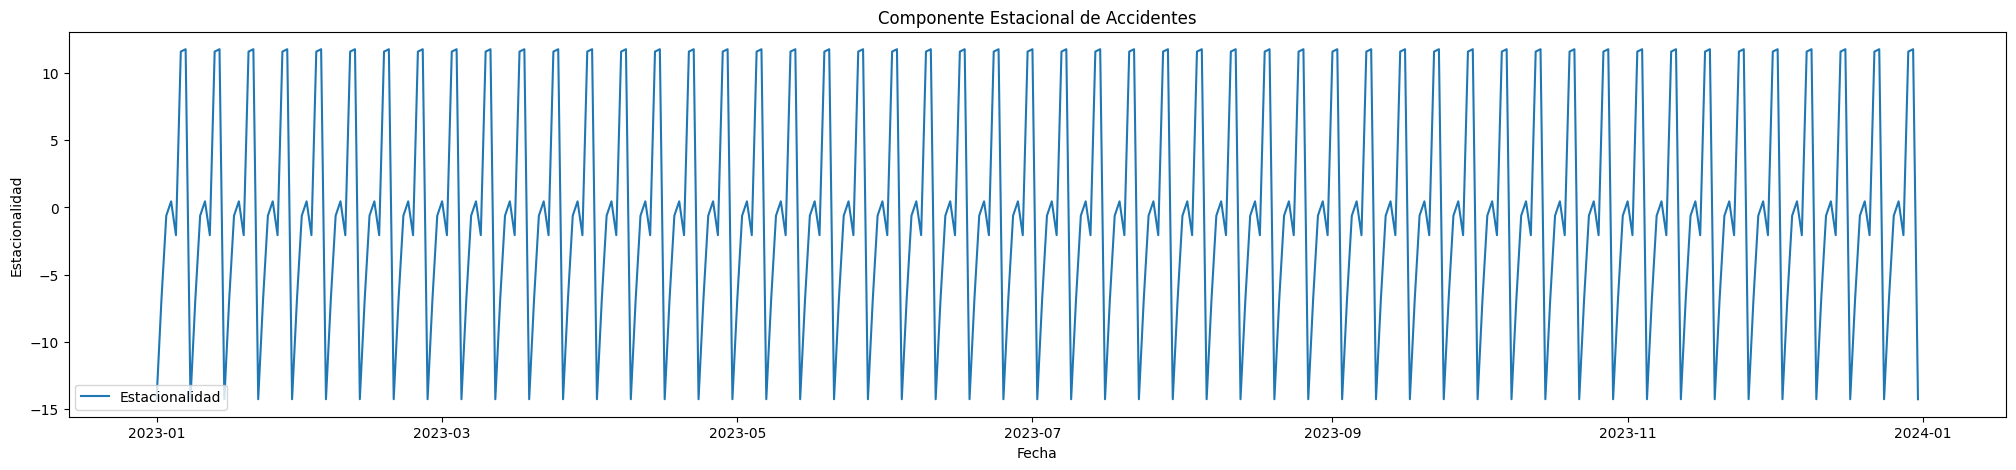

In [ ]:


# Descomposición de la serie
decomposition = seasonal_decompose(Personas_accidentadas_dia['Personas_accidentadas_por_dia'], model='additive', period=7)

# Graficar solo el componente de estacionalidad
plt.figure(figsize=(25, 5))
plt.plot(decomposition.seasonal, label='Estacionalidad')
plt.title('Componente Estacional de Accidentes')
plt.xlabel('Fecha')
plt.ylabel('Estacionalidad')
plt.legend()
plt.show()

## Analisis de la estacionalidad

El análisis de la serie de tiempo de accidentes de tránsito en Bogotá revela una clara estacionalidad semanal. Se observa un patrón recurrente en el que los días viernes y sábados (fines de semana) presentan el mayor número de accidentes, mientras que los domingos muestran los valores más bajos. Esta estacionalidad sugiere que factores relacionados con el aumento del tráfico los fines de semana, como el mayor flujo vehicular, eventos sociales y comportamientos asociados a días de descanso, influyen significativamente en la ocurrencia de accidentes

# Variabilidad y Volatilidad


Las funciones utilizadas secuencialmente para analizar la Variabilidad y Volatilidad son:
*   std(): Calcula la desviación estándar de la serie, que mide cuánto se desvían los datos del promedio.
*  var(): Calcula la varianza , que es la dispersión promedio al cuadrado.

* pct_change(): Calcula el cambio porcentual diario, utilizado para medir la volatilidad.
*   mean(): Obtiene la media del cambio porcentual (volatilidad promedio).


*   plt.plot: Gráfica los cambios porcentuales diarios.







Desviación estándar: 19.83070490027493
Varianza: 393.25685684178814
Volatilidad promedio diaria (media del cambio porcentual): 0.0390915670051128
Desviación estándar del cambio porcentual (volatilidad): 0.2981645131214315


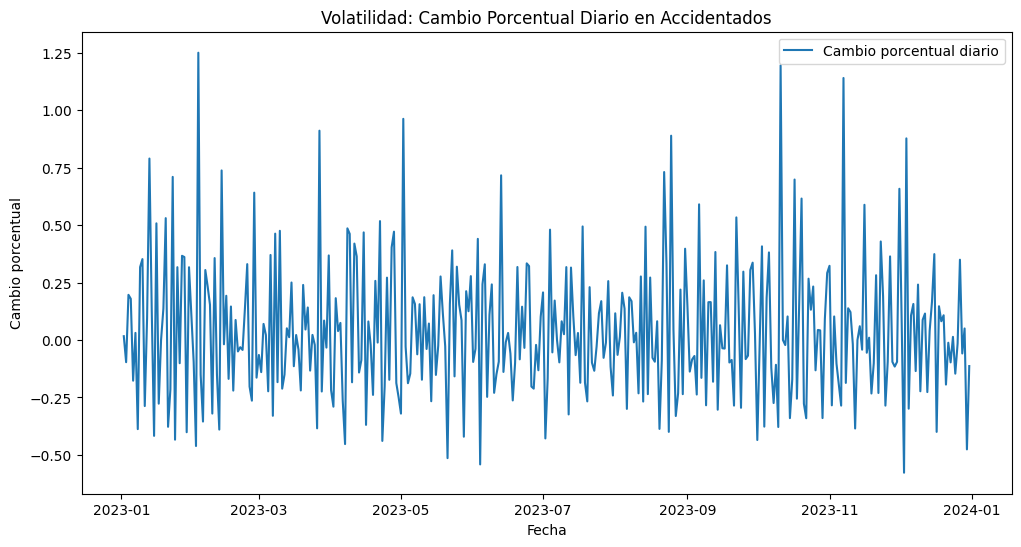

In [ ]:

serie = Personas_accidentadas_dia['Personas_accidentadas_por_dia']

# 1. Calcular variabilidad con la desviación estándar y la varianza
variabilidad_std = serie.std()  # Desviación estándar
variabilidad_var = serie.var()  # Varianza

print(f"Desviación estándar: {variabilidad_std}")
print(f"Varianza: {variabilidad_var}")

# 2. Calcular la volatilidad mediante el cambio porcentual diario
volatilidad = serie.pct_change().dropna()  # Cambio porcentual diario

# Medidas de volatilidad
media_volatilidad = volatilidad.mean()  # Media del cambio porcentual
std_volatilidad = volatilidad.std()  # Desviación estándar del cambio porcentual

print(f"Volatilidad promedio diaria (media del cambio porcentual): {media_volatilidad}")
print(f"Desviación estándar del cambio porcentual (volatilidad): {std_volatilidad}")

# 3. Graficar la volatilidad
plt.figure(figsize=(12, 6))
plt.plot(volatilidad, label='Cambio porcentual diario')
plt.title('Volatilidad: Cambio Porcentual Diario en Accidentados')
plt.xlabel('Fecha')
plt.ylabel('Cambio porcentual')
plt.legend()
plt.show()

## Analisis de la Variabilidad y Volatilidad

Análisis de Variabilidad y Volatilidad:

La desviación estándar de aproximadamente 19.83 indica una alta variabilidad en el número diario de personas accidentadas respecto al promedio, lo que muestra cambios significativos en esta cifra de un día a otro. Esto se confirma con la varianza de 393.26 , que refleja una gran dispersión diaria en el número de personas accidentadas, indicando que esta cantidad no es constante y tiene fluctuaciones notables.

La volatilidad media diaria de 3.9% —una medida del cambio porcentual diario— sugiere una tendencia al aumento en el número de personas accidentadas de un día a otro. Sin embargo, la desviación estándar del cambio porcentual , de 29.8% , indica una volatilidad alta: el número de personas accidentales cambia significativamente de un día al siguiente. Esto significa que, aunque hay una tendencia general alza, existen fluctuaciones importantes, con algunos días en los que la cantidad de personas accidentadas aumenta y otros en los que disminuye, lo que evidencia un comportamiento irregular en la serie diaria de personas accidentadas.

# Autocorrelación


Las funciones utilizadas secuencialmente para analizar la Autocorrelación son:
*   plot_acf: Genera el gráfico de autocorrelación (ACF) para identificar correlaciones entre los valores de la serie y sus rezagos.
*   plot_pacf: Genera el gráfico de autocorrelación parcial (PACF) , que elimina la influencia de valores intermedios.



<Figure size 1000x500 with 0 Axes>

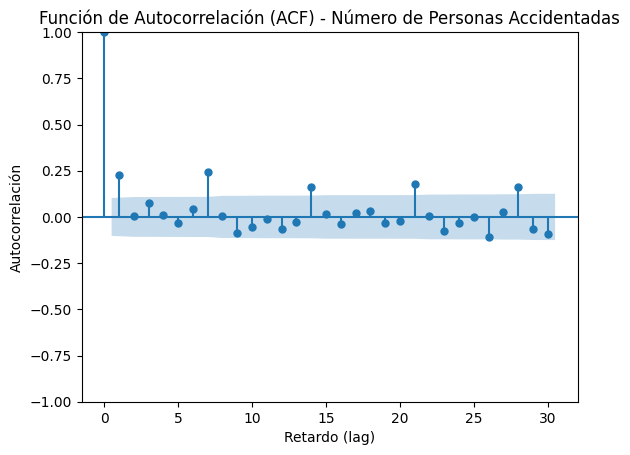

In [ ]:
# Gráfico de la autocorrelación (ACF)
plt.figure(figsize=(10, 5))
plot_acf(Personas_accidentadas_dia['Personas_accidentadas_por_dia'], lags=30)
plt.title("Función de Autocorrelación (ACF) - Número de Personas Accidentadas")
plt.xlabel("Retardo (lag)")
plt.ylabel("Autocorrelación")
plt.show()



*   Retardo de 1 día : se Observa una autocorrelación de aproximadamente 24% para el retardo de 1 día. Esto sugiere que el número de personas accidentadas en un día tiene cierta relación con el número de accidentados del día siguiente, aunque no es muy fuerte.

*   Retardo de 7 días : Existe una correlacion de alrededor del 25% entre el número de personas accidentadas en días separados por 7 días (una semana). Esto podría indicar un posible patrón semanal en los accidentes, en el cual los valores de accidentes de un día tienden a asemejarse a los de la semana siguiente.


*  Retardos de 21 y 28 días : También se observa una autocorrelación de aproximadamente 20% para los retardos de 21 y 28 días. Esto podría sugerir cierta estacionalidad mensual (aproximadamente cada 3 o 4 semanas), aunque es menos fuerte y consistente.






<Figure size 1000x500 with 0 Axes>

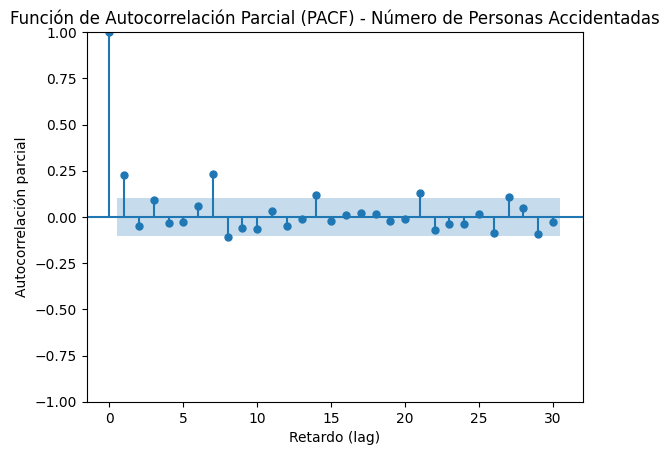

In [ ]:
# Gráfico de la autocorrelación parcial (PACF)
plt.figure(figsize=(10, 5))
plot_pacf(Personas_accidentadas_dia['Personas_accidentadas_por_dia'], lags=30, method='ywm')
plt.title("Función de Autocorrelación Parcial (PACF) - Número de Personas Accidentadas")
plt.xlabel("Retardo (lag)")
plt.ylabel("Autocorrelación parcial")
plt.show()



*   Autocorrelación en Retardos de 7 Días (PACF) : La gráfica de PACF muestra una correlación significativa en el retardo de 7 días (alrededor del 25%), lo que sugiere una influencia directa de un evento (cantidad de personas accidentadas) en relación con el mismo día de la semana anterior. Esto puede indicar una posible estacionalidad semanal en la serie temporal, ya que la cantidad de accidentes parece estar correlacionada con el patrón de la semana.
*  Autocorrelación en Retardo de 1 Día : En el retardo de 1 día, tanto el ACF como el PACF muestran una correlación cercana a 0.24. Esto implica que hay una relación significativa entre días consecutivos en la serie.

*   La gráfica de la Función de Autocorrelación Parcial (PACF) muestra autocorrelaciones significativas en retardos de múltiplos de 7 (7, 14, 21 y 28 días), mientras que la Función de Autocorrelación (ACF) presenta estas correlaciones en los retardos de 7, 14 , 21 y 27 días. Esta diferencia en los retardos de 27 y 28 días entre ambas funciones refleja cómo el PACF permite identificar la relación directa entre un retardo específico y el valor actual, sin la influencia de retardos intermedios, a diferencia del ACF, que puede incluir estos efectos acumulativos. Estos patrones sugieren una posible estacionalidad semanal, con cierta consistencia






# Anomalias y Picos


Las funciones utilizadas secuencialmente para analizar las Anomalias y picos son:
*   mean(): Calcula los medios de la serie para establecer un punto central.

*   std(): Calcula la desviación estándar , que se utiliza para definir los umbrales de anomalías.
*   Operadores lógicos ( >y <): Identifican anomalías y picos comparando los valores con los umbrales definidos.


*   plt.scatter: Resalta los días con anomalías y picos en el gráfico principal.



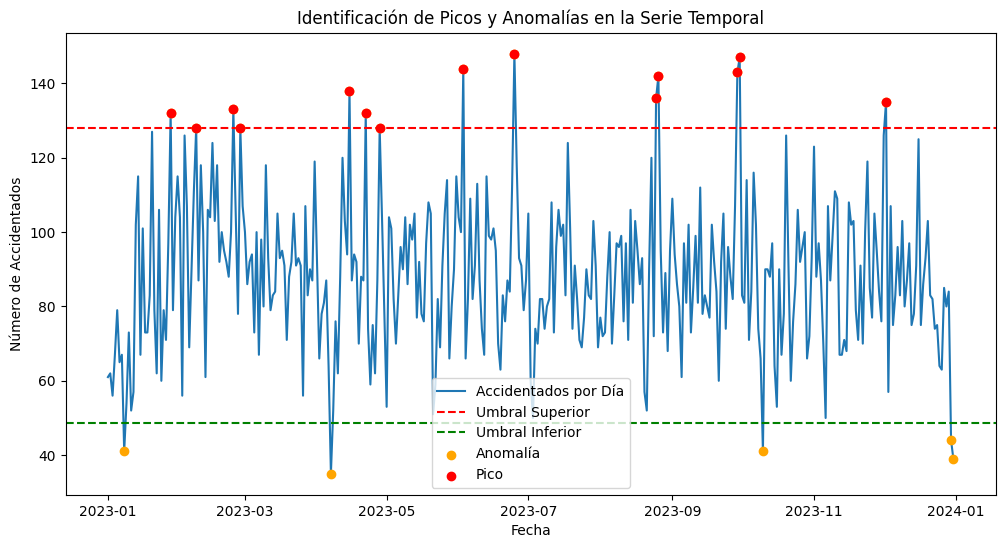

In [ ]:



# Calcular la media y desviación estándar de la serie
media = Personas_accidentadas_dia['Personas_accidentadas_por_dia'].mean()
desviacion_estandar = Personas_accidentadas_dia['Personas_accidentadas_por_dia'].std()

# Definir umbral para anomalías,  más allá de 2 desviaciones estándar
umbral_alto = media + 2 * desviacion_estandar
umbral_bajo = media - 2 * desviacion_estandar

# Identificar anomalías
Personas_accidentadas_dia['anomalía'] = (Personas_accidentadas_dia['Personas_accidentadas_por_dia'] > umbral_alto) | (Personas_accidentadas_dia['Personas_accidentadas_por_dia'] < umbral_bajo)

# Identificar picos específicamente (valores mucho más altos que el promedio)
Personas_accidentadas_dia['pico'] = Personas_accidentadas_dia['Personas_accidentadas_por_dia'] > umbral_alto

# Graficar la serie temporal, mostrando los picos y anomalías
plt.figure(figsize=(12, 6))
plt.plot(Personas_accidentadas_dia.index, Personas_accidentadas_dia['Personas_accidentadas_por_dia'], label='Accidentados por Día')
plt.axhline(y=umbral_alto, color='r', linestyle='--', label='Umbral Superior')
plt.axhline(y=umbral_bajo, color='g', linestyle='--', label='Umbral Inferior')

# Marcar picos y anomalías
plt.scatter(Personas_accidentadas_dia.index[Personas_accidentadas_dia['anomalía']], Personas_accidentadas_dia['Personas_accidentadas_por_dia'][Personas_accidentadas_dia['anomalía']], color='orange', label='Anomalía', zorder=5)
plt.scatter(Personas_accidentadas_dia.index[Personas_accidentadas_dia['pico']], Personas_accidentadas_dia['Personas_accidentadas_por_dia'][Personas_accidentadas_dia['pico']], color='red', label='Pico', zorder=5)

plt.title('Identificación de Picos y Anomalías en la Serie Temporal')
plt.xlabel('Fecha')
plt.ylabel('Número de Accidentados')
plt.legend()
plt.show()

In [ ]:
Personas_accidentadas_dia[Personas_accidentadas_dia['pico']==True]

,Personas_accidentadas_por_dia,anomalía,pico
Fecha_Acc,,,
2023-01-28,132,True,True
2023-02-08,128,True,True
2023-02-24,133,True,True
2023-02-27,128,True,True
2023-04-15,138,True,True
2023-04-22,132,True,True
2023-04-28,128,True,True
2023-06-03,144,True,True
2023-06-25,148,True,True


In [ ]:
Personas_accidentadas_dia['Personas_accidentadas_por_dia'][Personas_accidentadas_dia['anomalía']]

,Personas_accidentadas_por_dia
Fecha_Acc,
2023-01-08,41
2023-01-28,132
2023-02-08,128
2023-02-24,133
2023-02-27,128
2023-04-07,35
2023-04-15,138
2023-04-22,132
2023-04-28,128


## Analisis  

 Se identifican 19 días con valores fuera de lo habitual. En cinco de estos días se detecto una cantidad inusualmente baja de personas accidentadas, destacando el 7 de abril, con solo 35 personas accidentadas. Por otro lado, se identificaron 14 días con picos elevados de accidentalidad, sobresaliendo el 25 de junio con 148 personas accidentadas. Gran parte de estos días anómalos coinciden con fines de semana, festivos y periodos de vacaciones, lo que sugiere que los incrementos en la movilidad, eventos de alta concurrencia y factores estacionales podrían influir en estos comportamientos extremos.